In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 데이터 불러오기
df = pd.read_csv('Coupang-reviews/coupang_reviews.csv')

# 데이터 기본 정보 출력
print(df.info())
print(df.describe())
print(df.head())

# 예시: 평점 분포 시각화
if 'rating' in df.columns:
    plt.figure(figsize=(8,5))
    df['rating'].value_counts().sort_index().plot(kind='bar')
    plt.title('평점 분포', fontsize=15)
    plt.xlabel('평점', fontsize=12)
    plt.ylabel('리뷰 수', fontsize=12)
    plt.show()

# 예시: 리뷰 길이 분포 시각화
if 'review' in df.columns:
    df['review_length'] = df['review'].astype(str).apply(len)
    plt.figure(figsize=(8,5))
    df['review_length'].plot(kind='hist', bins=30)
    plt.title('리뷰 길이 분포', fontsize=15)
    plt.xlabel('리뷰 길이', fontsize=12)
    plt.ylabel('리뷰 수', fontsize=12)
    plt.show()

# 예시: 날짜별 리뷰 수 추이
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    daily_counts = df.groupby(df['date'].dt.date).size()
    plt.figure(figsize=(12,5))
    daily_counts.plot()
    plt.title('날짜별 리뷰 수 추이', fontsize=15)
    plt.xlabel('날짜', fontsize=12)
    plt.ylabel('리뷰 수', fontsize=12)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      499 non-null    object
 1   작성일자    500 non-null    object
 2   평점      500 non-null    int64 
 3   리뷰 내용   500 non-null    object
 4   세정력     500 non-null    object
 5   촉촉함     500 non-null    object
 6   피부자극    500 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.5+ KB
None
               평점
count  500.000000
mean     4.732000
std      0.639526
min      1.000000
25%      5.000000
50%      5.000000
75%      5.000000
max      5.000000
           이름        작성일자  평점  \
0  soooooniii  2025.08.26   5   
1       찐리뷰어에  2025.08.18   5   
2         박*미  2025.08.26   5   
3         문*미  2025.07.03   5   
4        찐빵이잉  2025.08.06   5   

                                               리뷰 내용 세정력 촉촉함 피부자극  
0  요즘 피부에 여드름인지 뭐가 많이 생겨서 뭐가 좋을까 하다가 구매해 봤어요이번에 아...   -   -    -  
1  2개월간 써본 이마트러블 해결

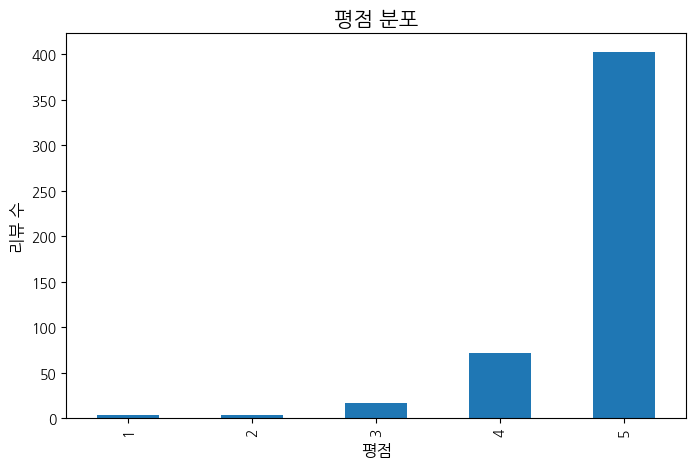

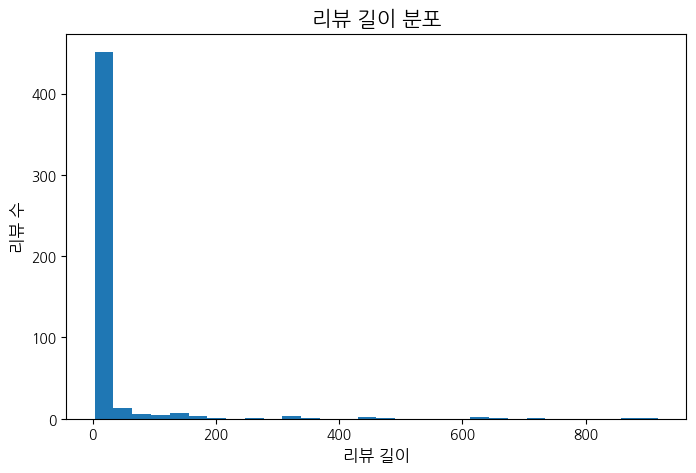

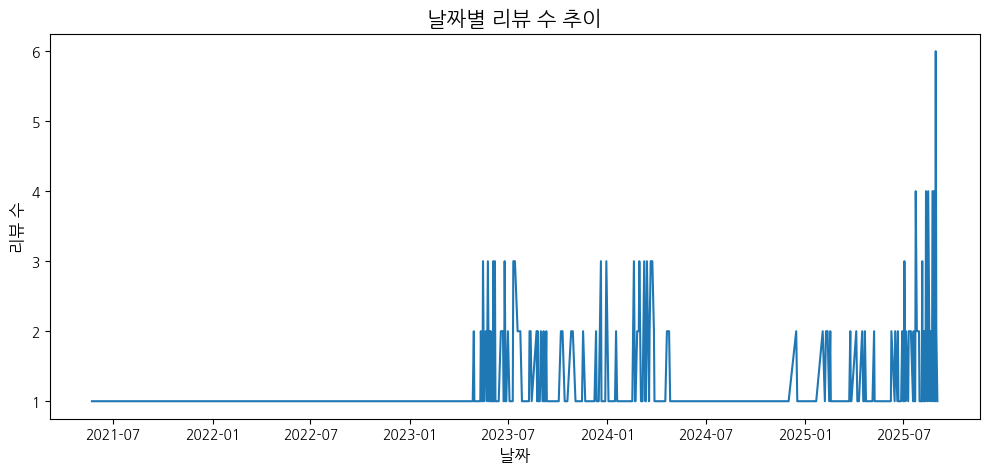

In [5]:
# 한글 폰트 적용
plt.rc('font', family='NanumGothic')

# 평점 분포 시각화
plt.figure(figsize=(8,5))
df['평점'].value_counts().sort_index().plot(kind='bar')
plt.title('평점 분포', fontsize=15)
plt.xlabel('평점', fontsize=12)
plt.ylabel('리뷰 수', fontsize=12)
plt.show()

# 리뷰 길이 분포 시각화
df['리뷰 길이'] = df['리뷰 내용'].astype(str).apply(len)
plt.figure(figsize=(8,5))
df['리뷰 길이'].plot(kind='hist', bins=30)
plt.title('리뷰 길이 분포', fontsize=15)
plt.xlabel('리뷰 길이', fontsize=12)
plt.ylabel('리뷰 수', fontsize=12)
plt.show()

# 날짜별 리뷰 수 추이
df['작성일자'] = pd.to_datetime(df['작성일자'], errors='coerce')
daily_counts = df.groupby(df['작성일자'].dt.date).size()
plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title('날짜별 리뷰 수 추이', fontsize=15)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('리뷰 수', fontsize=12)
plt.show()

In [6]:
from collections import Counter
import re
from wordcloud import WordCloud

# 리뷰 내용에서 키워드 추출 (간단하게 명사만 추출, 한글만)
def extract_keywords(text):
    # 한글 단어만 추출
    words = re.findall(r'[가-힣]{2,}', text)
    return words

# 모든 리뷰에서 키워드 리스트 생성
all_keywords = []
for review in df['리뷰 내용'].dropna():
    all_keywords.extend(extract_keywords(review))

# 키워드 빈도수 집계
keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(30)

# 데이터프레임으로 변환
keywords_df = pd.DataFrame(top_keywords, columns=['키워드', '빈도수'])
print(keywords_df)

# 시각화: 막대그래프
plt.figure(figsize=(12,6))
keywords_df.set_index('키워드')['빈도수'].plot(kind='bar', color='skyblue')
plt.title('리뷰 키워드 TOP 30', fontsize=15, fontproperties=fontprop)
plt.xlabel('키워드', fontsize=12, fontproperties=fontprop)
plt.ylabel('빈도수', fontsize=12, fontproperties=fontprop)
plt.xticks(rotation=45, fontproperties=fontprop)
plt.show()

# 시각화: 워드클라우드
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('리뷰 키워드 워드클라우드', fontsize=15, fontproperties=fontprop)
plt.show()

      키워드  빈도수
0    없습니다  434
1     등록된  433
2   리뷰내용이  433
3     어성초   22
4     거품이   20
5     아비브   19
6      피부   18
7      많이   13
8      진정   13
9      세안   13
10    아크네   13
11    클렌저   13
12    트러블   13
13    피부가   12
14     않고   11
15    약산성   11
16     너무   10
17     사용   10
18    피부에    9
19    느낌이    9
20   트러블이    8
21     정말    8
22    여드름    8
23     자극    8
24   있습니다    8
25     쓰고    8
26    좋아요    8
27     폼을    7
28    도움이    7
29     제품    7


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\NanumGothic.ttf'

<Figure size 1200x600 with 1 Axes>

OSError: cannot open resource